## 单变量线性回归

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 读取数据
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.tail()

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [5]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


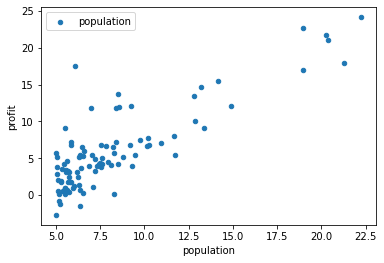

In [7]:
# 对 DataFrame 的数据格式做可视化处理
data.plot.scatter('population', 'profit', label='population')
plt.show()

In [9]:
# 构造数据集（先对数据进行预处理）
# 先在原始数据集的 population 列前面加入一列常数列
# 对于 DataFrame 而言。可以使用 DataFrame.insert(loc, column, value, allow_duplicates=False)进行插入数据操作
# 1. loc: 插入的列的索引
# 2. column: 插入列的标签，字符串
# 3. value: 插入列的值

data.insert(0, 'ones', 1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [11]:
# 开始构造数据集 X 和 y
# X（特征值矩阵）只需要 第一列和第二列（即 ones 和 population 这两列）
# y 则只需要最后一列
# 对于 DaraFrame 这种数据结构切片的时候可以用到 iloc 函数

X = data.iloc[:, 0:-1]
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
# 同样的方法切一下y的片
y = data.iloc[:, -1]
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [13]:
# 值得注意的是现在的数据都是 DataFrame 结构，但是我们后面要进行矩阵运算，所以我们要进行转换成数组型的结构
# DataFrame -> ndarray 三种方法
# 1. df.values
# 2. df.as.matrix()
# 3. np.arrag(df)
# 我们使用第一种方法

X = X.values

In [14]:
X.shape

(97, 2)

In [15]:
y = y.values

In [16]:
y.shape

(97,)

In [17]:
# 开始定义损失函数
# 开始定义损失函数之前，我们先把 y 改成二维数组的格式，因为 y 现在是一位数组的格式
y = y.reshape(97, 1)
y.shape

(97, 1)

## 定义损失函数

In [22]:
# 损失函数传参： X（特征值） y（标签值/目标值）theta（目标值） 

def costFunction(X, y, theta):
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X))

In [23]:
# 对 theta 进行初始化
theta = np.zeros((2, 1))
theta.shape

(2, 1)

这里有个细节 因为损失函数中有： $X \theta-y$ ,要能减 $y$ 的条件就是 $X \theta$ 要和 $y$ 的维度一样，而通过上面可以知道 $X$ 的 shape (97,2)，而 $y$ 的 shape 为 (97,1)，问题就转换成 (97,2) 要乘以一个什么 shape 的 $\theta$ 才能和 $y$ 同样的 shape（因为相减必须要一样的shape） 即（97,1），那么容易推出 $\theta$ 的 shape 为（2,1）


In [24]:
# 有了 theta 的初始值，又有了损失函数，我们就可以知道损失函数的初始值是多少（）
cost_init = costFunction(X, y, theta) # 现在没有做任何优化前的损失函数的初始值代价肯定会很大
print(cost_init)

32.072733877455676


## 定义梯度下降函数
向量化后的表示：$\theta=\theta-\alpha \frac{1}{m} X^{T}(X \theta-y)$

In [28]:
# iters（迭代次数）即要求整个更新迭代的过程持续多少次
def gardientDescent(X, y, theta, alpha, iters):
    costs = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta - y)) * alpha / len(X)
        cost = costFunction(X, y, theta)
        costs.append(cost)
        
        if i % 100 == 0:
            print(cost)
            
    return theta, costs

In [29]:
# 对 学习率 alpha，和 迭代次数 iters 进行赋值
alpha = 0.02
iters = 2000

theta, costs = gardientDescent(X, y, theta, alpha, iters)

16.769642371667455
5.170668092303259
4.813840215803055
4.640559602034057
4.556412109403549
4.5155489085988645
4.4957051660486735
4.486068766778817
4.481389196347322
4.479116731414094
4.478013190619409
4.477477295755764
4.477217057705422
4.47709068246386
4.477029312876825
4.476999510945953
4.476985038710984
4.476978010791015
4.476974597934661
4.476972940603823


In [30]:
# 可以看出 代价函数的值一直在减小（进行了梯度下降），最后趋于平稳之即找到了我们的 goals
# 对代价函数值的变化过程进行可视化

## 可视化损失函数

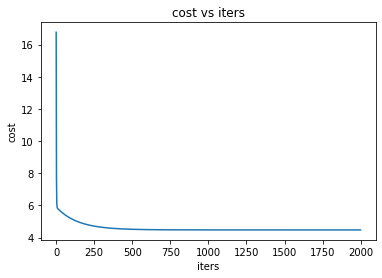

In [32]:
fig, ax = plt.subplots() # 初始化画板,ax 为初始化的实例，以后用 ax 这个实例进行绘图
ax.plot(np.arange(iters), costs)
ax.set(xlabel='iters', ylabel='cost', title='cost vs iters')
plt.show()

## 拟合函数可视化

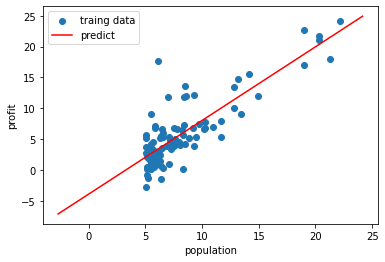

In [34]:
x = np.linspace(y.min(), y.max(), 100)
y_ = theta[0,0] + theta[1,0] * x

fig, ax = plt.subplots()
ax.scatter(X[:,1], y, label='traing data')
ax.plot(x, y_, 'r', label='predict')
ax.legend()
ax.set(xlabel='population', ylabel='profit')
plt.show()

这里解释一下上面的 theta0 和 theta1 的取值

[1,2]的shape值(2,)，意思是一维数组，数组中有2个元素。

[[1],[2]]的shape值是(2,1)，意思是一个二维数组，每行有1个元素。

[[1,2]]的shape值是（1，2），意思是一个二维数组，每行有2个元素。